# Import Required Libraries

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split, GridSearchCV
from collections import Counter
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

### Read the dataset 

In [2]:
df = pd.read_csv(r'C:\Users\Jatin Thakur\Downloads\MGP Project 1 RTA\Dataset/RTA Dataset.csv')
df.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

### Exploratory Data Analysis

In [3]:
df.shape  # the shape of the dataset

(12316, 32)

In [4]:
df.columns.values # column names in the dataset

array(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation',
       'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle',
       'Service_year_of_vehicle', 'Defect_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity'], dtype=object)

In [5]:
df.describe() # to see the descriptive stats of the dataset, for numeric columns

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

In [6]:
df.describe(include='object').T # to see descsriptive stats of the datasets, only for categorical data

count unique  \
Time                     12316   1074   
Day_of_week              12316      7   
Age_band_of_driver       12316      5   
Sex_of_driver            12316      3   
Educational_level        11575      7   
Vehicle_driver_relation  11737      4   
Driving_experience       11487      7   
Type_of_vehicle          11366     17   
Owner_of_vehicle         11834      4   
Service_year_of_vehicle   8388      6   
Defect_of_vehicle         7889      3   
Area_accident_occured    12077     14   
Lanes_or_Medians         11931      7   
Road_allignment          12174      9   
Types_of_Junction        11429      8   
Road_surface_type        12144      5   
Road_surface_conditions  12316      4   
Light_conditions         12316      4   
Weather_conditions       12316      9   
Type_of_collision        12161     10   
Vehicle_movement         12008     13   
Casualty_class           12316      4   
Sex_of_casualty          12316      3   
Age_band_of_casualty     12316      6   
Casualty_severity        12316      4   
Work_of_casuality         9118      7   
Fitness_of_casuality      9681      5   
Pedestrian_movement      12316      9   
Cause_of_accident        12316     20   
Accident_severity        12316      3   

                                                                      top  \
Time                                                             15:30:00   
Day_of_week                                                        Friday   
Age_band_of_driver                                                  18-30   
Sex_of_driver                                                        Male   
Educational_level                                      Junior high school   
Vehicle_driver_relation                                          Employee   
Driving_experience                                                 5-10yr   
Type_of_vehicle                                                Automobile   
Owner_of_vehicle                                                    Owner   
Service_year_of_vehicle                                           Unknown   
Defect_of_vehicle                                               No defect   
Area_accident_occured                                               Other   
Lanes_or_Medians         Two-way (divided with broken lines road marking)   
Road_allignment                            Tangent road with flat terrain   
Types_of_Junction                                                 Y Shape   
Road_surface_type                                           Asphalt roads   
Road_surface_conditions                                               Dry   
Light_conditions                                                 Daylight   
Weather_conditions                                                 Normal   
Type_of_collision                          Vehicle with vehicle collision   
Vehicle_movement                                           Going straight   
Casualty_class                                            Driver or rider   
Sex_of_casualty                                                      Male   
Age_band_of_casualty                                                   na   
Casualty_severity                                                       3   
Work_of_casuality                                                  Driver   
Fitness_of_casuality                                               Normal   
Pedestrian_movement                                      Not a Pedestrian   
Cause_of_accident                                           No distancing   
Accident_severity                                           Slight Injury   

                          freq  
Time                       120  
Day_of_week               2041  
Age_band_of_driver        4271  
Sex_of_driver            11437  
Educational_level         7619  
Vehicle_driver_relation   9627  
Driving_experience        3363  
Type_of_vehicle           3205  
Owner_of_vehicle         10459  
Service_year_of_vehicle   2883  
De

In [7]:
df.info() # to see the information about each column; data type, null-type, number of rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [8]:
df.duplicated().sum() # are there any duplicate rows?

0

In [9]:
df.isna().sum() # how many missing values in each column 

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [10]:
df.nunique() #unique values in each column

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [11]:
df.shape[1] #number of columns

32

####  As our target column is the Accident Severity column, we shall analyze it first.

In [12]:
df['Accident_severity'].value_counts() #how many of each unique value are present

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

<Axes: xlabel='Accident_severity', ylabel='count'>

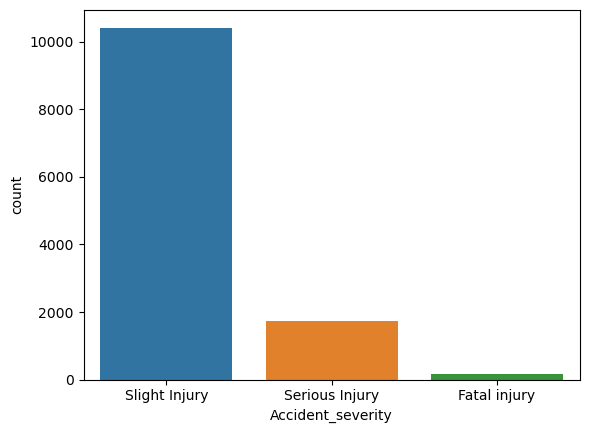

In [13]:
sns.countplot(x=df['Accident_severity'])

Text(0.5, 1.0, 'Accident Severity')

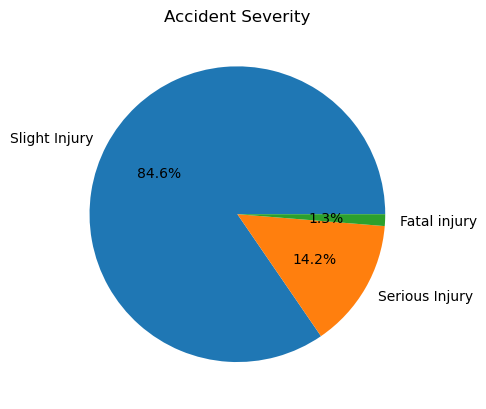

In [14]:
plt.pie(x=df['Accident_severity'].value_counts(),labels=df['Accident_severity'].unique(),autopct="%1.1f%%")
plt.title("Accident Severity")

In [15]:
px.treemap(df,path=['Cause_of_accident'])

In [16]:
col = ['Day_of_week','Age_band_of_driver','Owner_of_vehicle','Vehicle_driver_relation','Sex_of_driver','Type_of_vehicle','Number_of_vehicles_involved','Number_of_casualties','Casualty_class','Sex_of_casualty','Age_band_of_casualty','Casualty_severity','Accident_severity']
len(col)

13

In [17]:
df['Driving_experience'].value_counts()

Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64

<Axes: xlabel='Number_of_vehicles_involved', ylabel='Driving_experience'>

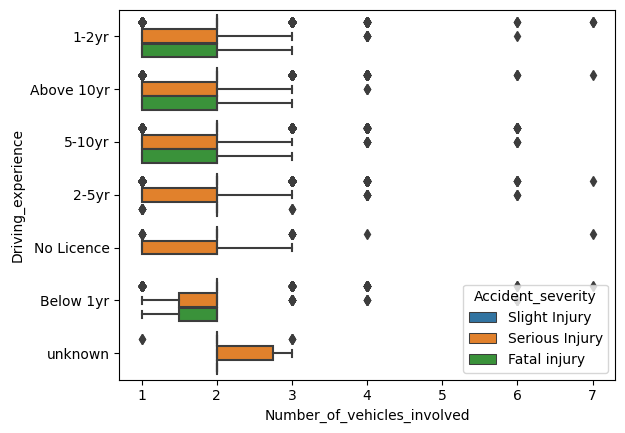

In [18]:
sns.boxplot(data=df,x='Number_of_vehicles_involved',y='Driving_experience',hue='Accident_severity')

<Axes: xlabel='Number_of_vehicles_involved', ylabel='Number_of_casualties'>

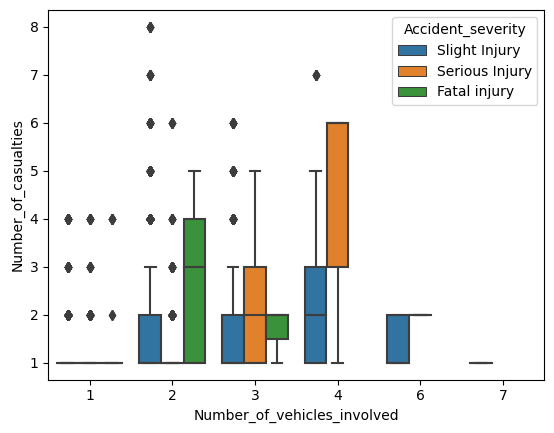

In [19]:
sns.boxplot(data=df,x='Number_of_vehicles_involved',y='Number_of_casualties',hue='Accident_severity')

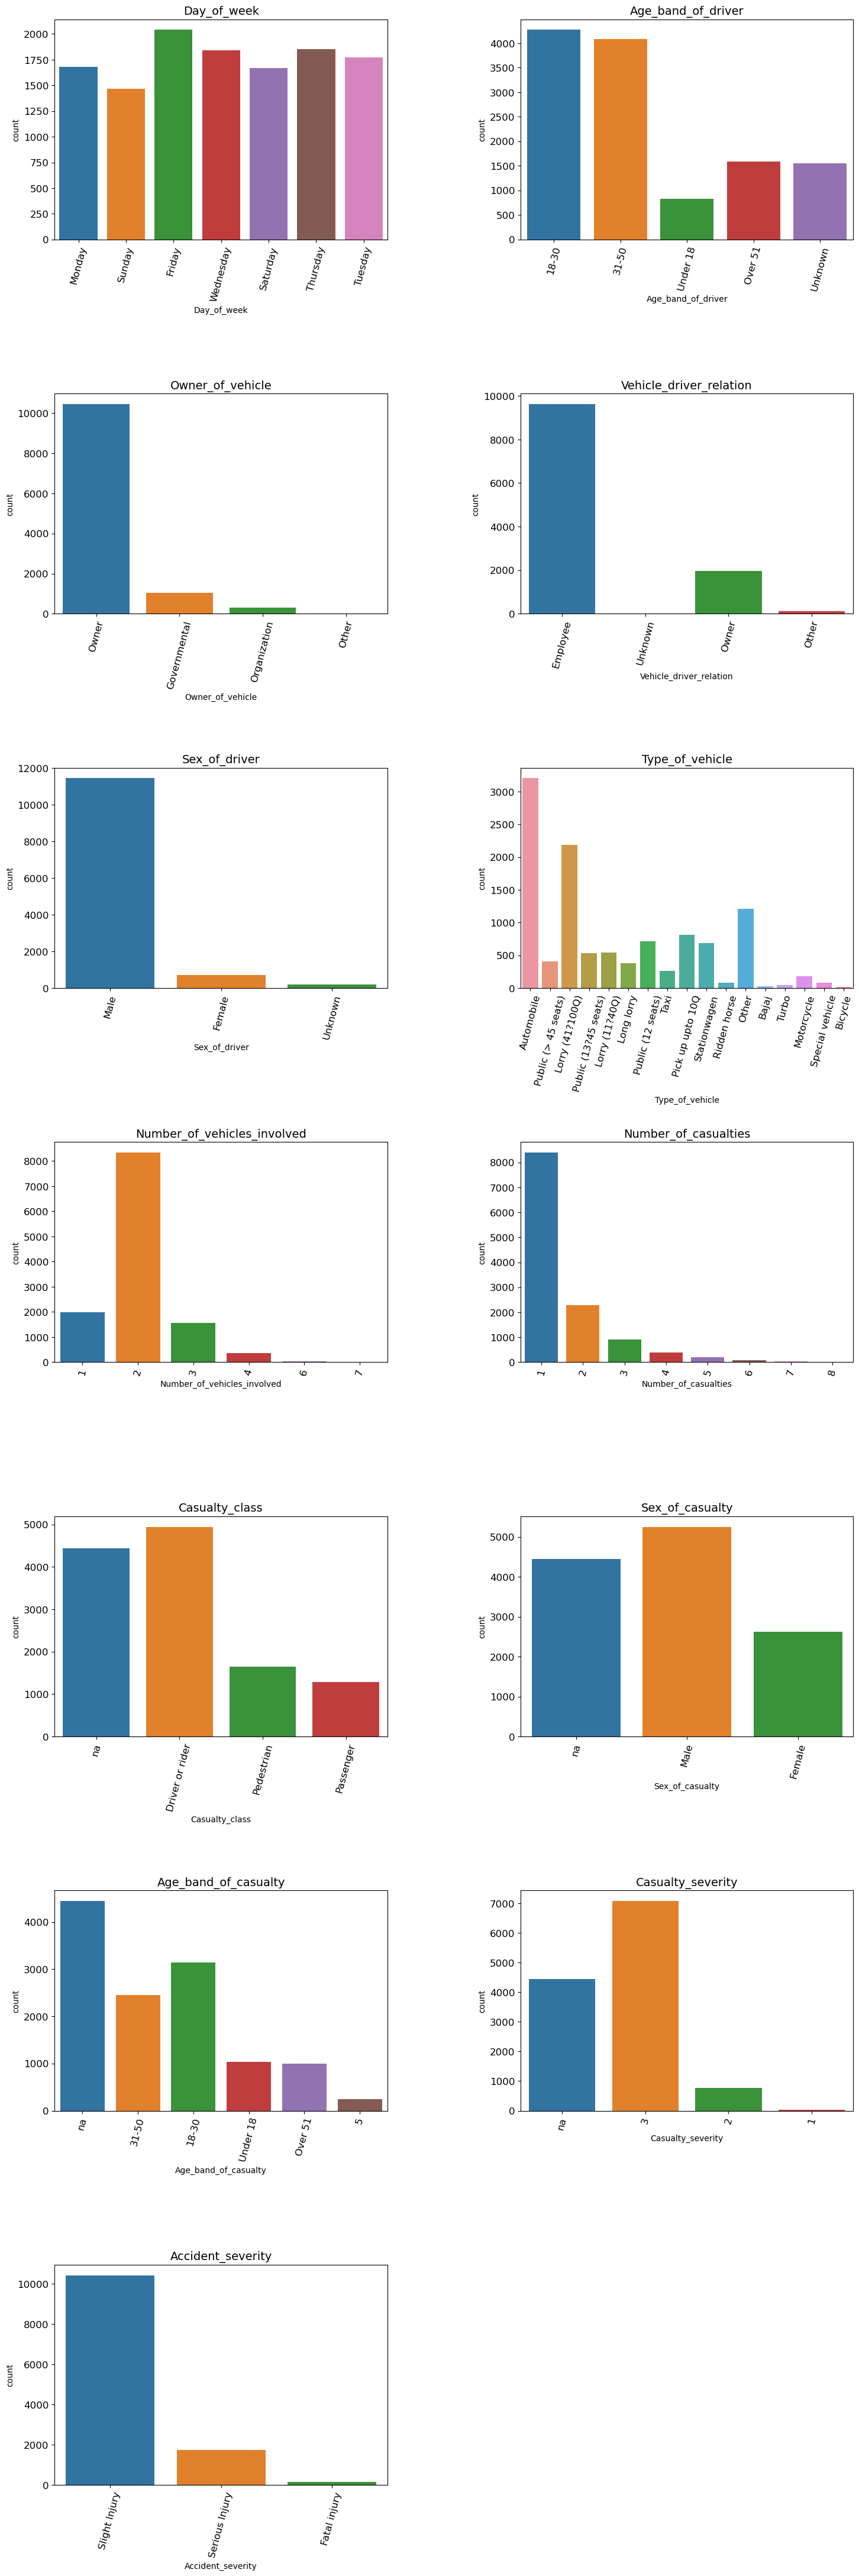

In [20]:
ss=0
plt.figure(figsize=(15,60))
for i in col:
    ss+=1
    plt.subplot(8,2,ss)
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=75,fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(i,fontsize=14)

plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9, wspace=0.4, hspace=0.7)
plt.show()

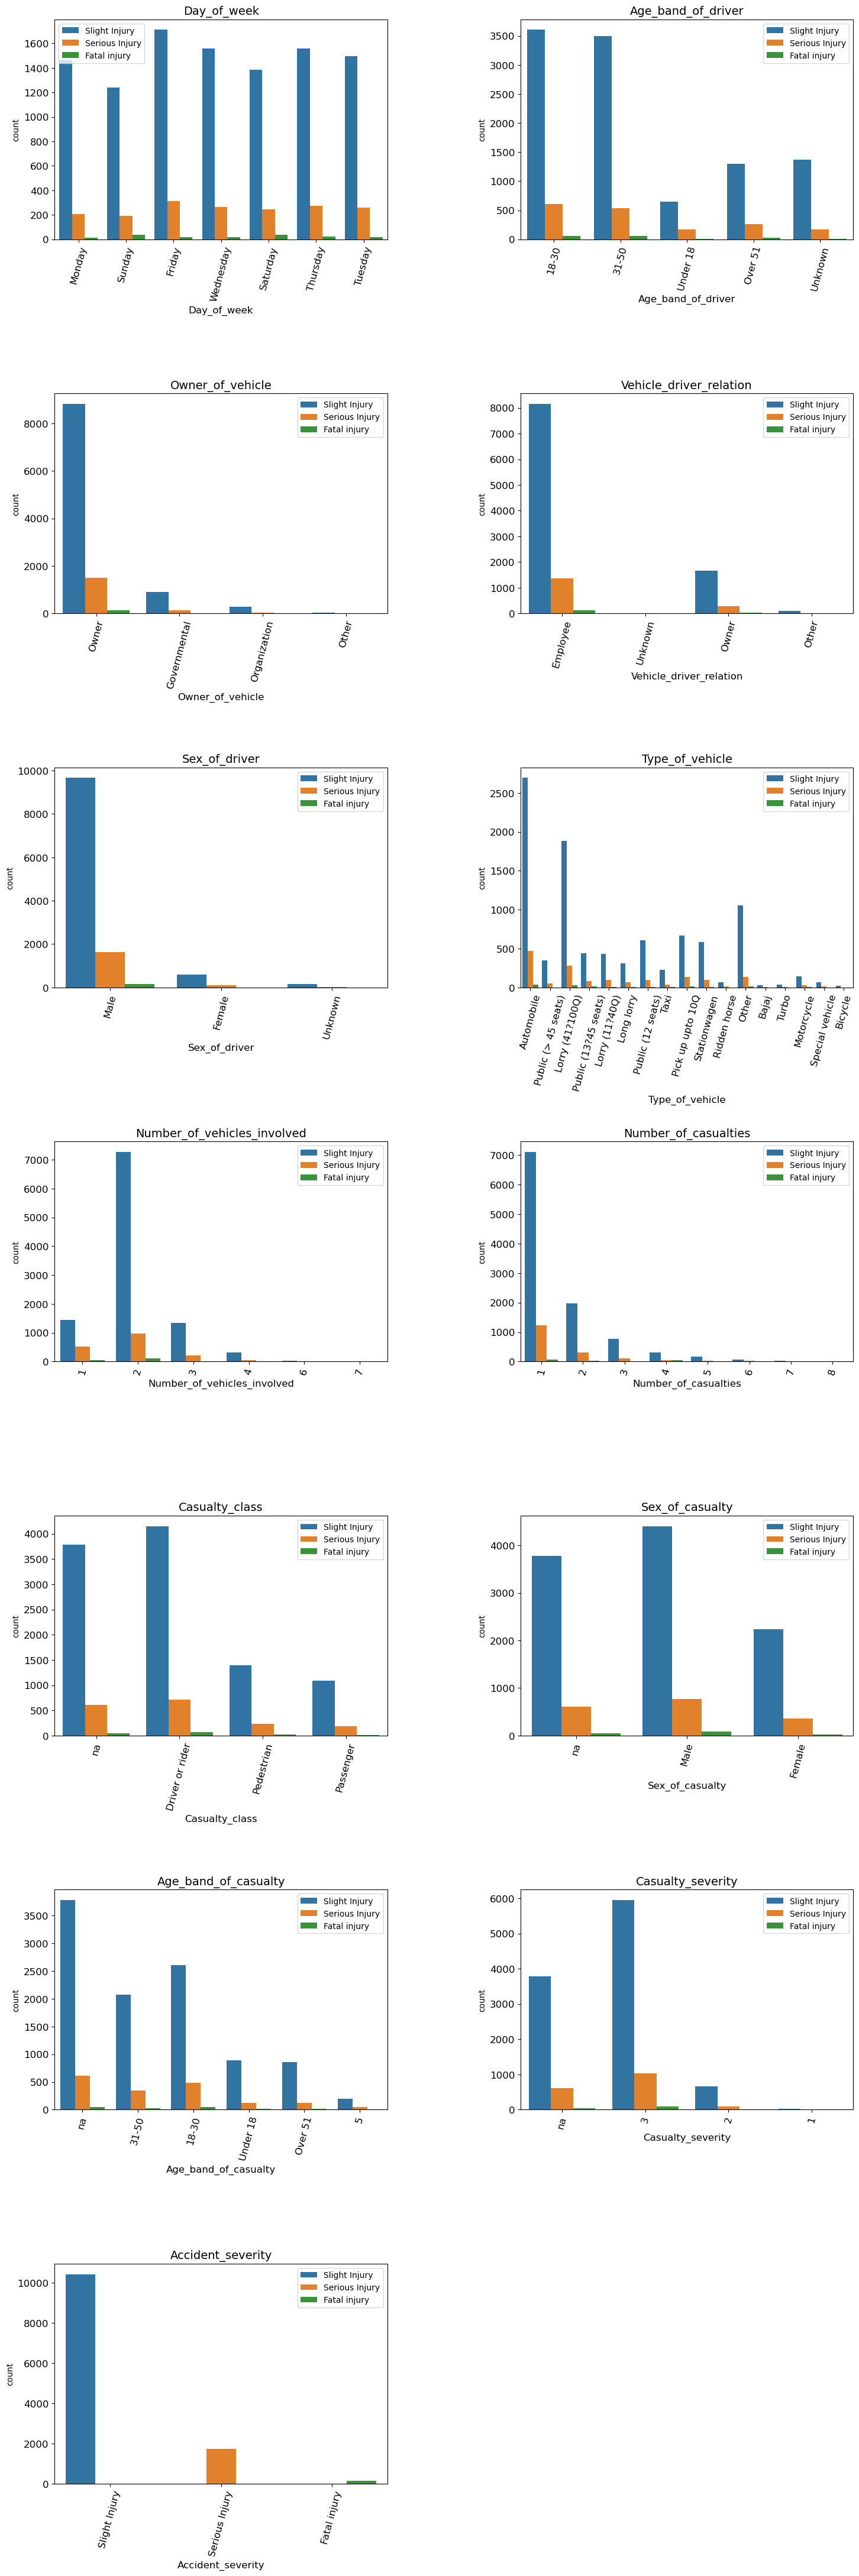

In [21]:
sa = 0
plt.figure(figsize=(15,60))
for i in col:
    sa+=1
    plt.subplot(8,2,sa)
    sns.countplot(x=i,data=df,hue='Accident_severity')
    plt.xlabel(i,fontsize=12)
    plt.legend()
    plt.xticks(rotation=75,fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(i, fontsize=14)


plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9, wspace=0.4, hspace=0.7)
plt.show()

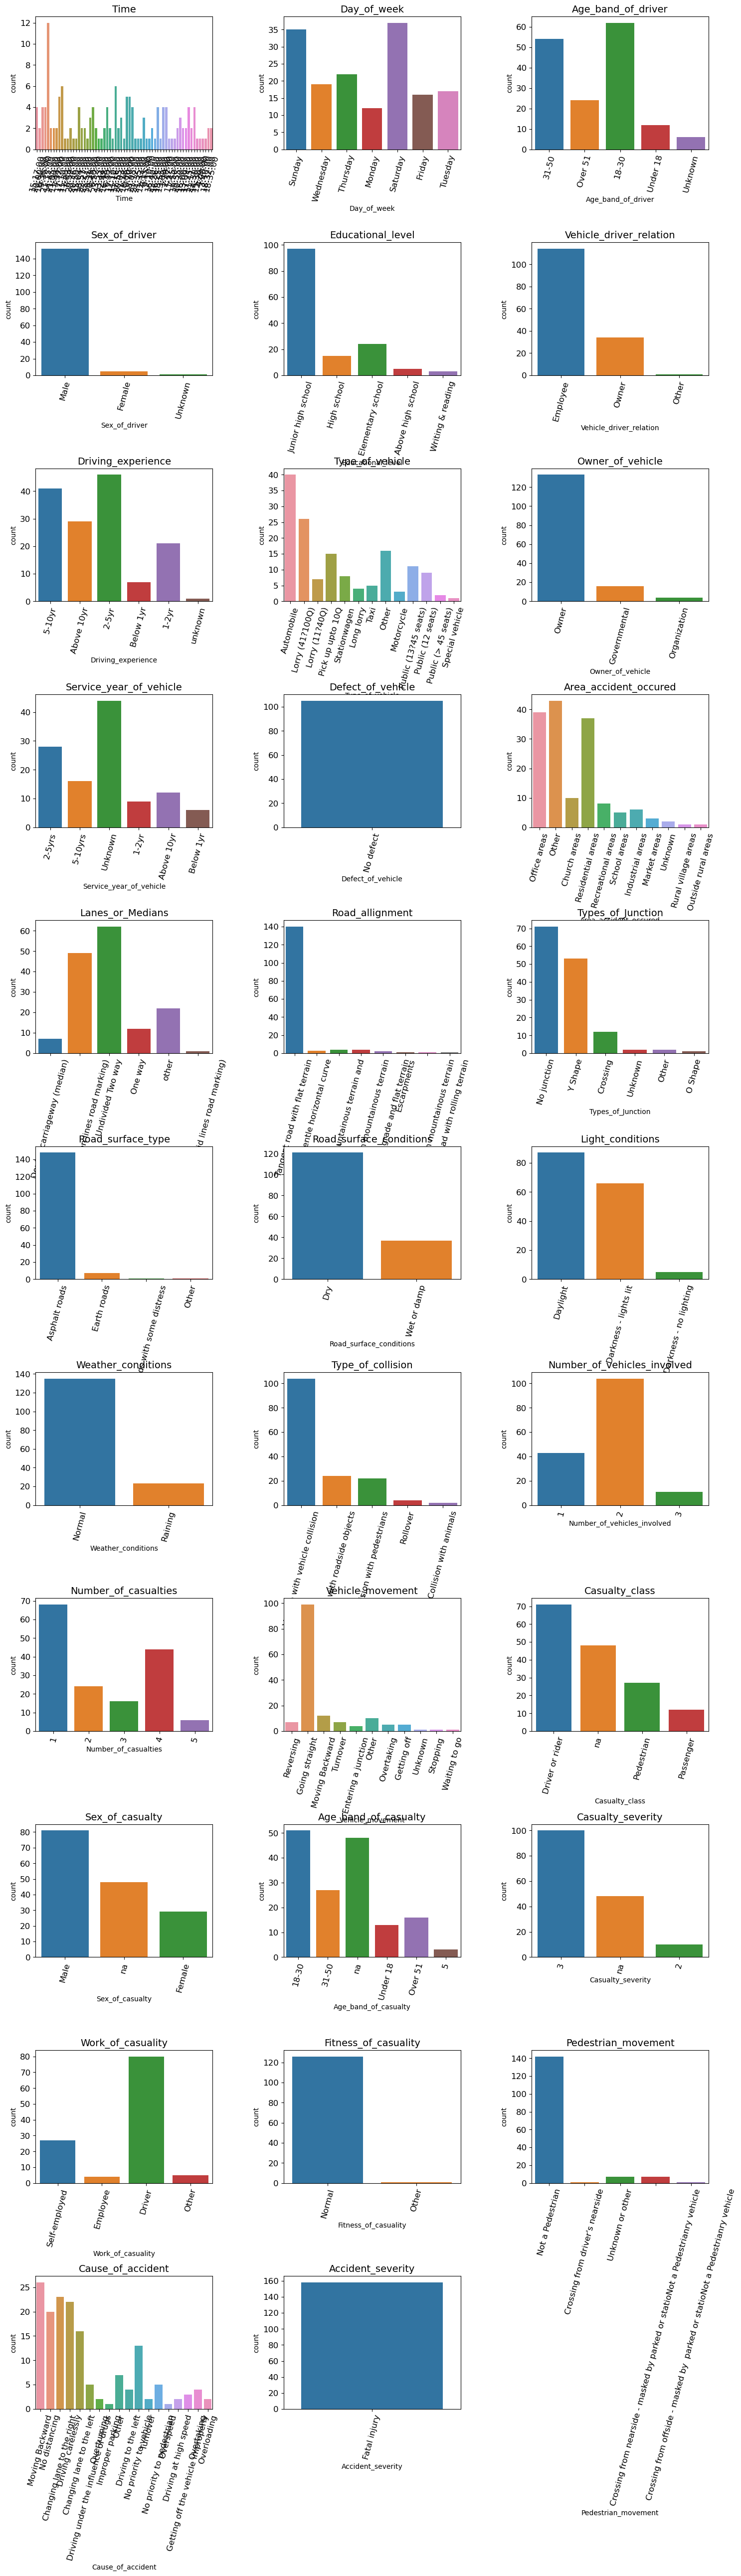

In [22]:
ss=0
plt.figure(figsize=(15,60))
for i in df.columns:
    ss+=1
    plt.subplot(11,3,ss)
    sns.countplot(x=i,data=df[df['Accident_severity']=='Fatal injury'])
    plt.xticks(rotation=75,fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(i,fontsize=14)

plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9, wspace=0.4, hspace=0.7)
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y='Cause_of_accident',data=df[df['Accident_severity']=='Fatal injury'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

For Fatal Injuries:
+ Most of the accident with fatal injuries occur on Saturdays and Sundays.
+ Frequent drivers in the accident are in the age band of 18-30.
+ Most drivers have driving experience of 2-5 years.
+ All of the vehicles in the accident causing fatal injuries didn't have any kind of defect.
+ All of the fatal injuries causing accidents happened on the road with surface conditions either 'dry' or 'wet', weather conditions either 'normal' or 'raining'.
+ There can be seen a considerable number of count of accidents with fatal injuries with number of casualties equals to 4, although the maximum count is for number of casualties equals to 1.
+ Strongest cause of accidents leading to fatal injuries involved vehicle 'Moving backwards', followed by 'Changing lane to right', and 'Driving carelessly'.
+ The times at which the frequency of fatal accidents was the highest is around 3PM-11PM. Also there is a peak visible around 11AM.
</div> 

In [23]:
df['Time'] = pd.to_datetime(df['Time'])

In [24]:
df['Time'].dtype

dtype('<M8[ns]')

In [25]:
df['Hour']=df['Time'].dt.hour

In [26]:
df.drop('Time',axis=1, inplace=True)

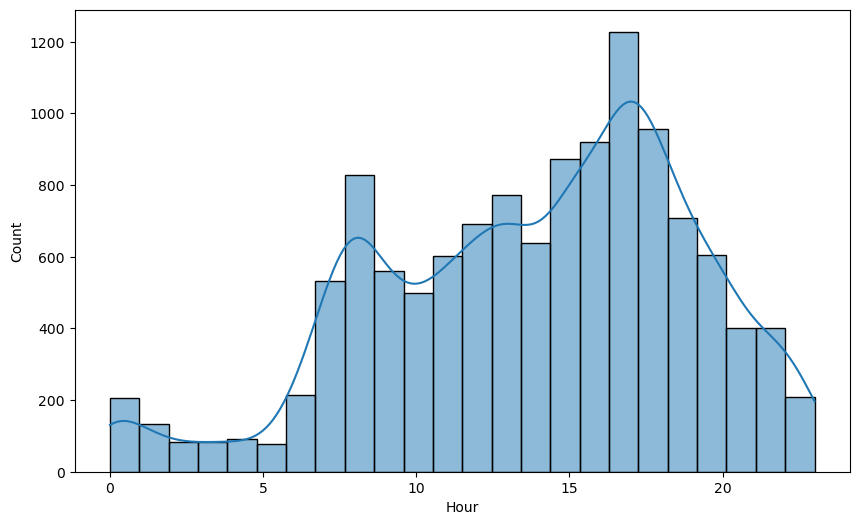

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df['Hour'],bins=24,kde=True)
plt.show()

<Axes: xlabel='Hour', ylabel='count'>

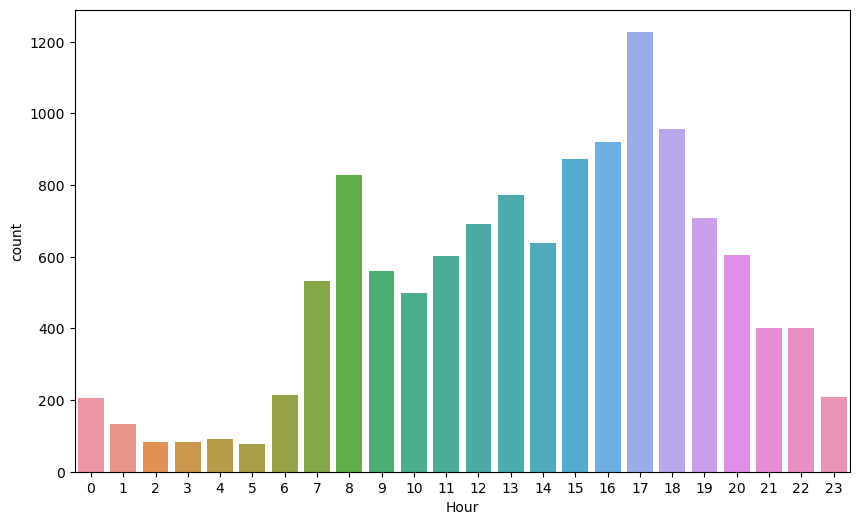

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Hour')

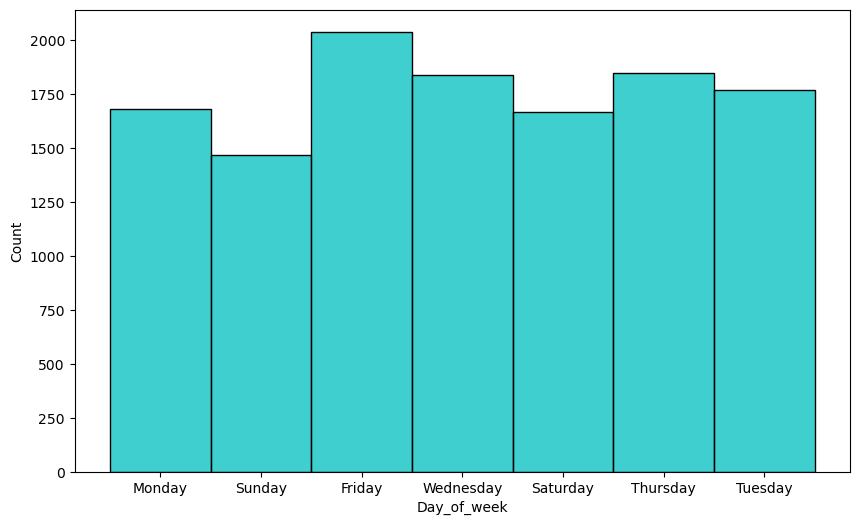

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df['Day_of_week'],bins=7,color='c')
plt.show()

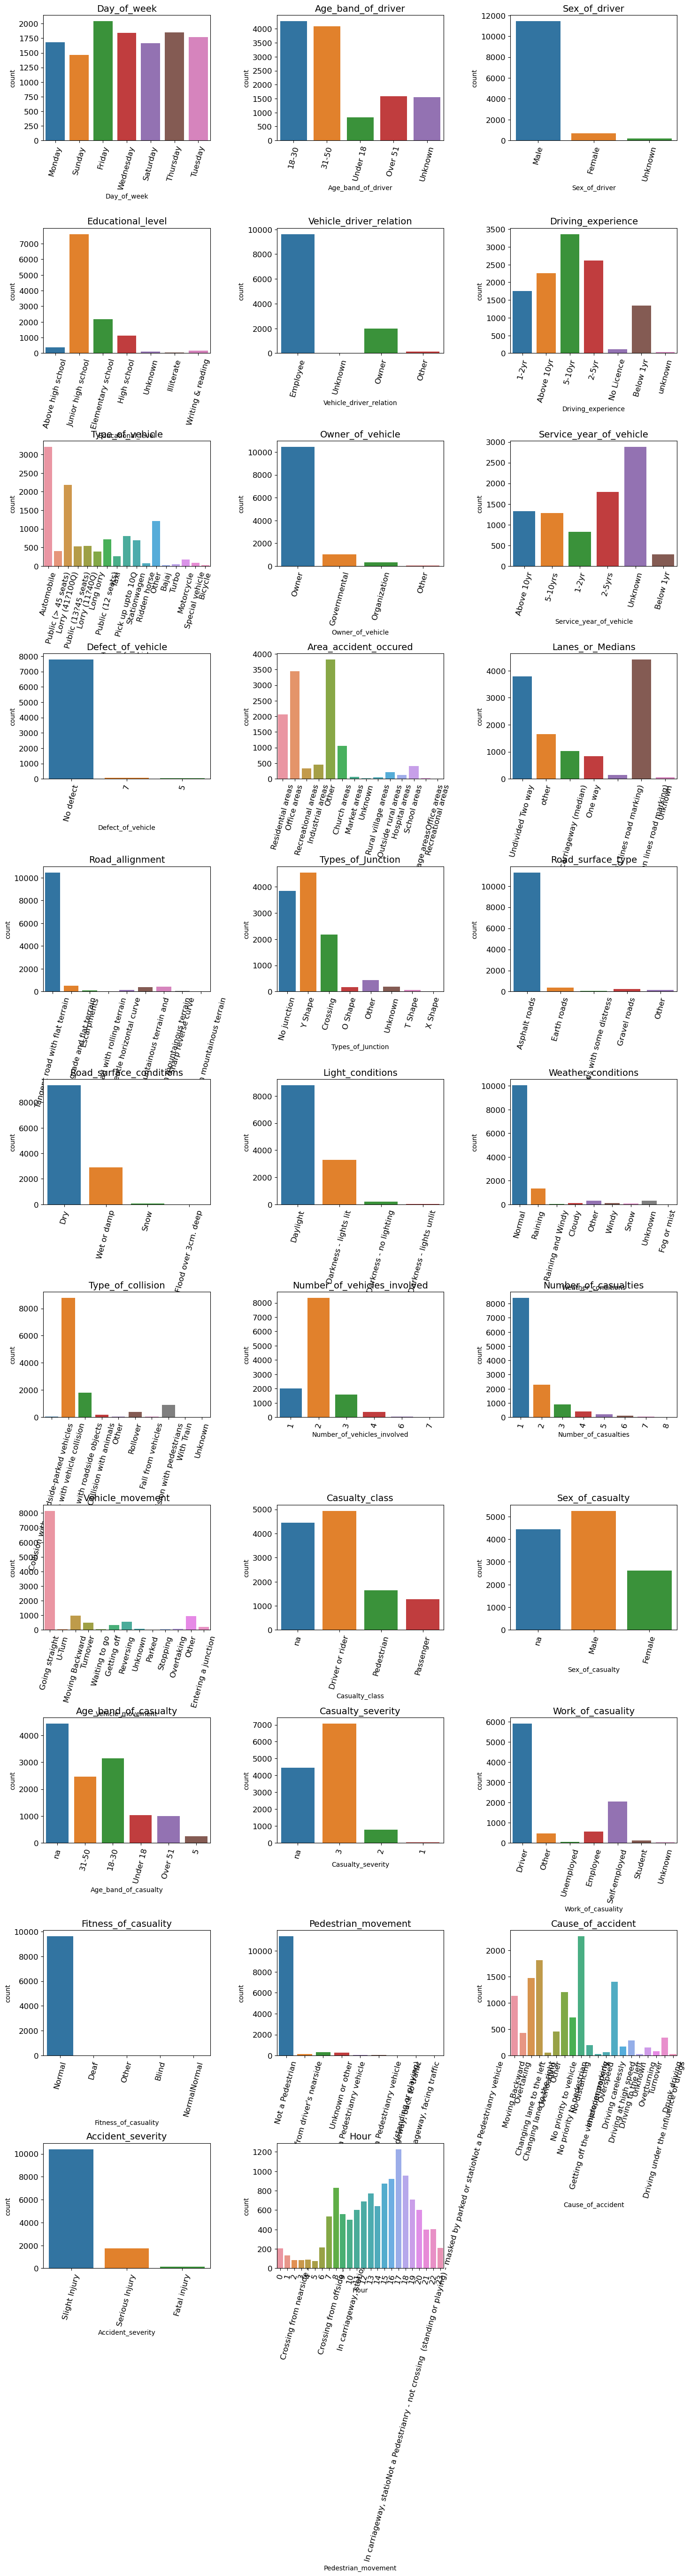

In [30]:
ss=0
plt.figure(figsize=(15,60))
for i in df.columns:
    ss+=1
    plt.subplot(11,3,ss)
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=75,fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(i,fontsize=14)

plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9, wspace=0.4, hspace=0.7)
plt.show()

Text(0, 0.5, '')

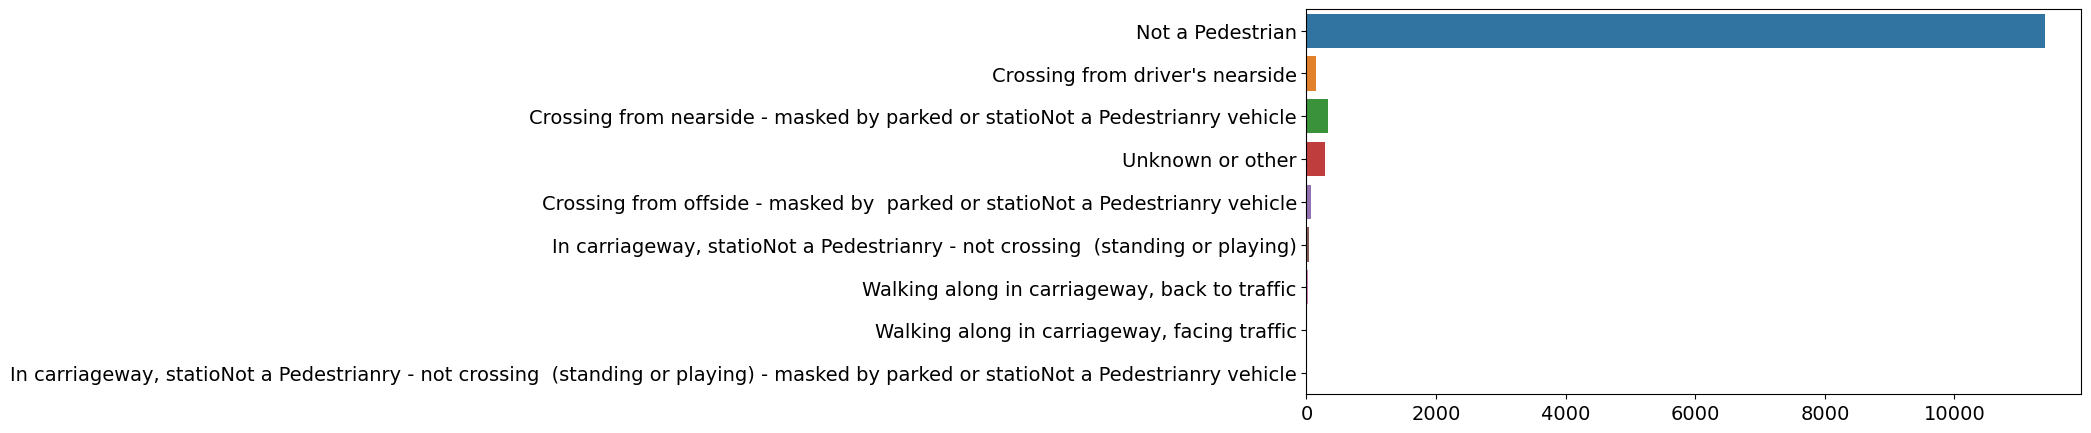

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(y='Pedestrian_movement',data=df)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')

Text(0, 0.5, '')

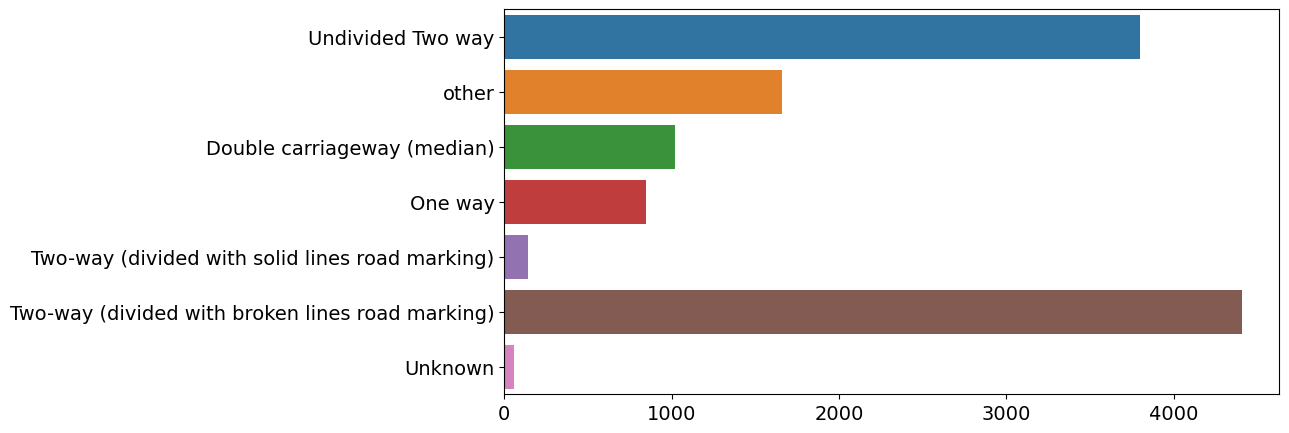

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(y='Lanes_or_Medians',data=df)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')

Text(0, 0.5, '')

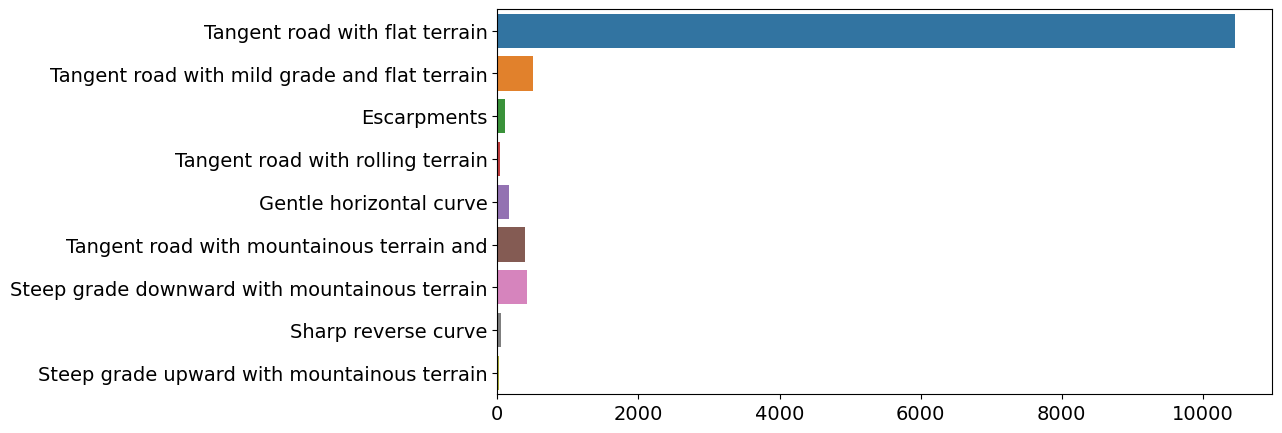

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(y='Road_allignment',data=df)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')

Text(0, 0.5, '')

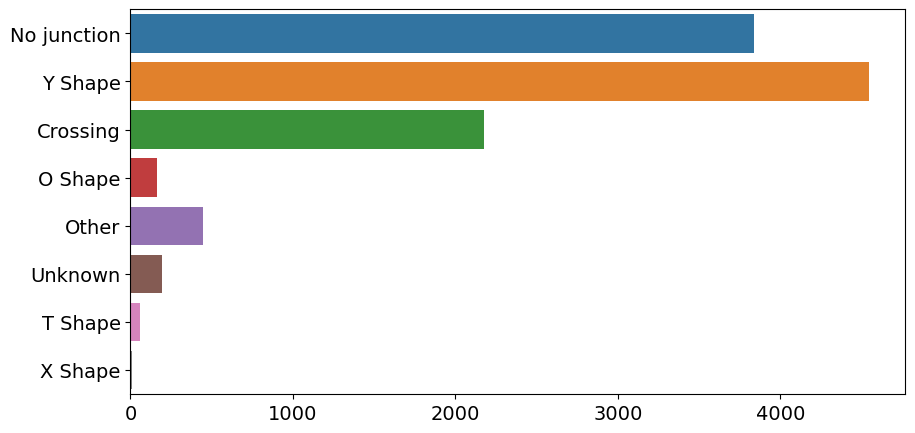

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(y='Types_of_Junction',data=df)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')

Text(0, 0.5, '')

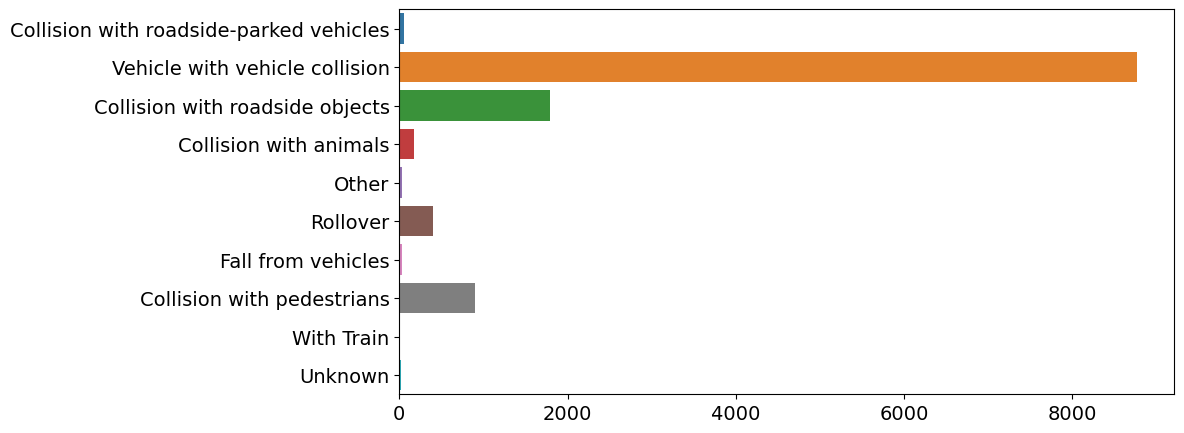

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(y='Type_of_collision',data=df)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

Highest Accident occurences:
+ Day of week - Friday
+ Hour of the day - Morning 8AM, Afternoon around 3PM - 6PM, mostly at 5PM
+ Sex of driver - Males, however it is also a fact that there are more male drivers than female drivers
+ Educational level - Drivers having educational level of Junior High school have been most frequent
+ Driving Experience - Between 5-10 years
+ Type of vehicle - Automobiles are most frequently caught in accidents, however the fact to be taken into consideration is that there are higher numbers of automobiles than any other type of vehicle
+ Owner - Most of the vehicles are privately owned.
+ Area - Mostly unknown, however other most frequent occurences around Residential and office areas
+ Road Lanes, Alignment, Junction, Type of Surface, Surface conditions,
    + Two-way lanes; Divided and undivided
    + Tangent road with flat terrain of road alignment
    + Most accidents occured around Y-shaped junctions, Crossings or roads having no junction
    + Most road types are Asphalt
    + Surface conditions of road - dry
+ Types of collisions - Vehicle to vehicle
+ Most frequently number of vehicles involved are 2 and number of casualties are 1
+ Highest casualty count is of the drivers
+ Highest casualty severity count is for 3
+ Severity of most accidents is 'Slight Injury'
</div>

Now we may see which columns can be used as features in our model training and which are useless.
+ Day of Week - This can be checked whether there are certain days on which accidents occur more frequently or if weekends result in more nnumber of accidents.
+ Age band of driver -  This sure can be a feature to be considered.
+ SEX OF DRIVER - This has to be further analyzed whether males or females cause more accident.
+ Educational level - Should be considered as it can be seen from the data that 'Junior High school' involvements are way higher than any other category
+ VEHICLE DRIVER RELATION - This seems to be of no importance, for this only tells us the vehicle driver relation and most of the vehicles in motion are driven by employees
+ Driving Experience - Surely a highly experienced driver will be more skilled(probably), and will probably avert accidents than a lesser experienced driver
+ Type of vehicle - Different types of vehicle have different probability to be caught in an accident.
+ OWNER OF VEHICLE - This is doubtful as most of the vehicles out there are owned privately
+ Service year of vehicle - An old vehicle might have aged out and could be in a bad condition.
+ DEFECT OF VEHICLE - Not considered
+ Area of accident occurence - This could be counted as a feature as some areas might be prone to accidents more than the others
+ Lanes - Number of lanes can definitely be counted as a factor as it describes the situation around the place of accident
+ Road alignment - Another feature affecting the accident occurence
+ Types of junction, Road surface type, Road surface conditions, Light conditions, Weather conditions, Type of collision, Number of vehicles involved, Number of casualties, Vehicle movement, Casualty class, Sex of casualty, Age band of casualty, Casualty severity, Pedestrian movement, Cause of accident, Hour - are counted as important features in model training.
+ WORK OF CASUALTY - Will not make any impact

# Questions which can be asked from this given dataset.

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Q1. Is the leading cause of accidents 'Changing lanes'?</font></h2><br>
    This means that we wish to calculate the number and hence the fraction of accidents caused by the drivers who change lanes while driving.

In [36]:
# we create a new dataset which is the copy of our original dataset
ndf = df.copy(deep=True)

In [37]:
cl = pd.crosstab(index=ndf['Cause_of_accident'],columns=ndf['Accident_severity'],margins=True)
cl

Accident_severity                     Fatal injury  Serious Injury  \
Cause_of_accident                                                    
Changing lane to the left                       16             206   
Changing lane to the right                      23             260   
Driving at high speed                            2              31   
Driving carelessly                              22             209   
Driving to the left                              4              53   
Driving under the influence of drugs             5              46   
Drunk driving                                    0               3   
Getting off the vehicle improperly               3              29   
Improper parking                                 1               2   
Moving Backward                                 26             162   
No distancing                                   20             303   
No priority to pedestrian                        5              95   
No priority to vehicle                          13             149   
Other                                            7              64   
Overloading                                      2              10   
Overspeed                                        1              15   
Overtaking                                       4              75   
Overturning                                      2              23   
Turnover                                         2               6   
Unknown                                          0               2   
All                                            158            1743   

Accident_severity                     Slight Injury    All  
Cause_of_accident                                           
Changing lane to the left                      1251   1473  
Changing lane to the right                     1525   1808  
Driving at high speed                           141    174  
Driving carelessly                             1171   1402  
Driving to the left                             227    284  
Driving under the influence of drugs            289    340  
Drunk driving                                    24     27  
Getting off the vehicle improperly              165    197  
Improper parking                                 22     25  
Moving Backward                                 949   1137  
No distancing                                  1940   2263  
No priority to pedestrian                       621    721  
No priority to vehicle                         1045   1207  
Other                                           385    456  
Overloading                                      47     59  
Overspeed                                        45     61  
Overtaking                                      351    430  
Overturning                                     124    149  
Turnover                                         70     78  
Unknown                                          23     25  
All                                           10415  12316

In [38]:
s=0
for i in cl.columns.to_list():
    print(f"Accidents(Caused by changing lanes) leading to {i} : {(cl.iloc[0,s]+cl.iloc[1,s])}/{cl.loc['All'][s]}, {round(((cl.iloc[0,s]+cl.iloc[1,s])/cl.loc['All'][s])*100,2)} %")
    s+=1

Accidents(Caused by changing lanes) leading to Fatal injury : 39/158, 24.68 %
Accidents(Caused by changing lanes) leading to Serious Injury : 466/1743, 26.74 %
Accidents(Caused by changing lanes) leading to Slight Injury : 2776/10415, 26.65 %
Accidents(Caused by changing lanes) leading to All : 3281/12316, 26.64 %


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Observation:</font></h3>
    
It can be seen that accident caused by 'Changing Lanes' are almost 1/4 of the total number of accidents causing all types of injuries, which means that it is the foremost cause of accidents.

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Q2. Which gender is more involved in accidents?</font></h2><br>
    Are men more involved in accidents or females?

In [39]:
(ndf.groupby(['Sex_of_driver']).size()/ndf['Sex_of_driver'].count()*100).reset_index().rename(columns={0:'% of accidents'})

Sex_of_driver  % of accidents
0        Female        5.691783
1          Male       92.862943
2       Unknown        1.445274

#### Does the above table show that males are more involved in accidents and cause more number of accidents than women? This can be further explored by finding the proportions of injuries pertaining to each gender.

In [40]:
sr = pd.crosstab(index=ndf[ndf['Sex_of_driver']!='Unknown']['Sex_of_driver'],columns=ndf['Accident_severity'],margins=True)
sr

Accident_severity  Fatal injury  Serious Injury  Slight Injury    All
Sex_of_driver                                                        
Female                        5             104            592    701
Male                        152            1621           9664  11437
All                         157            1725          10256  12138

In [41]:
s=0
for i in sr.columns.to_list()[:3]:
    print(f"P(Female | {i}) : {(sr.iloc[0,s]/sr.iloc[0,3])*100}%")
    print(f"P(Male | {i}) : {(sr.iloc[1,s]/sr.iloc[1,3])*100}%","\n")
    s+=1

P(Female | Fatal injury) : 0.7132667617689016%
P(Male | Fatal injury) : 1.3290198478622017% 

P(Female | Serious Injury) : 14.835948644793154%
P(Male | Serious Injury) : 14.173297193319925% 

P(Female | Slight Injury) : 84.45078459343794%
P(Male | Slight Injury) : 84.49768295881788% 



<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Observation:</font></h3>
    
We see that when we analyze the accident data based on the ratios of accidents caused by men and women, we don't see rather significant difference which was visible if we look at the data directly.

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Q3. How better are 'one-way' roads than 'two-way' roads in preventing accidents, and is a specific type of 'two-way' road better in avoiding accidents?</font></h2><br>

In [42]:
rl = pd.crosstab(index=ndf['Lanes_or_Medians'],columns=ndf['Accident_severity'],margins=True)
rl

Accident_severity                                 Fatal injury  \
Lanes_or_Medians                                                 
Double carriageway (median)                                  7   
One way                                                     12   
Two-way (divided with broken lines road marking)            49   
Two-way (divided with solid lines road marking)              1   
Undivided Two way                                           62   
Unknown                                                      0   
other                                                       22   
All                                                        153   

Accident_severity                                 Serious Injury  \
Lanes_or_Medians                                                   
Double carriageway (median)                                  132   
One way                                                      114   
Two-way (divided with broken lines road marking)             656   
Two-way (divided with solid lines road marking)               21   
Undivided Two way                                            524   
Unknown                                                        6   
other                                                        242   
All                                                         1695   

Accident_severity                                 Slight Injury    All  
Lanes_or_Medians                                                        
Double carriageway (median)                                 881   1020  
One way                                                     719    845  
Two-way (divided with broken lines road marking)           3706   4411  
Two-way (divided with solid lines road marking)             120    142  
Undivided Two way                                          3210   3796  
Unknown                                                      51     57  
other                                                      1396   1660  
All                                                       10083  11931

In [43]:
s=0
for i in rl.columns.to_list():
    print(f"Accidents({i}) on one-way: {rl.iloc[1,s]/rl.loc['All'][s]*100}%")
    print(f"Accidents({i}) on two-way: {(rl.iloc[2,s]+rl.iloc[3,s]+rl.iloc[4,s])/rl.loc['All'][s]*100}%","\n")
    s+=1

Accidents(Fatal injury) on one-way: 7.8431372549019605%
Accidents(Fatal injury) on two-way: 73.20261437908496% 

Accidents(Serious Injury) on one-way: 6.725663716814159%
Accidents(Serious Injury) on two-way: 70.85545722713864% 

Accidents(Slight Injury) on one-way: 7.130814241793117%
Accidents(Slight Injury) on two-way: 69.78081920063474% 

Accidents(All) on one-way: 7.082390411532981%
Accidents(All) on two-way: 69.97736987679156% 



<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Observation:</font></h3>
    
A significant difference in accident occurrence is visible when comparing accidents occurred on one-way and two-way roads which, with no doubt, deem one-way roads much safer than the two-way roads.

In [44]:
s=0
for i in rl.columns.to_list():
    print(f"Accidents({i}) on two-way(broken lines road marking): {rl.iloc[2,s]/rl.loc['All'][s]*100}%")
    print(f"Accidents({i}) on two-way(solid lines road marking): {rl.iloc[3,s]/rl.loc['All'][s]*100}%")
    print(f"Accidents({i}) on two-way(undivided): {rl.iloc[4,s]/rl.loc['All'][s]*100}%","\n")
    s+=1

Accidents(Fatal injury) on two-way(broken lines road marking): 32.02614379084967%
Accidents(Fatal injury) on two-way(solid lines road marking): 0.6535947712418301%
Accidents(Fatal injury) on two-way(undivided): 40.52287581699346% 

Accidents(Serious Injury) on two-way(broken lines road marking): 38.70206489675516%
Accidents(Serious Injury) on two-way(solid lines road marking): 1.238938053097345%
Accidents(Serious Injury) on two-way(undivided): 30.914454277286136% 

Accidents(Slight Injury) on two-way(broken lines road marking): 36.75493404740652%
Accidents(Slight Injury) on two-way(solid lines road marking): 1.1901219875037192%
Accidents(Slight Injury) on two-way(undivided): 31.835763165724483% 

Accidents(All) on two-way(broken lines road marking): 36.970916100913584%
Accidents(All) on two-way(solid lines road marking): 1.1901768502221106%
Accidents(All) on two-way(undivided): 31.816276925655856% 



<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Observation:</font></h3>

    Accidents can be avoided using solid lines to divide a two-way road, way better than broken lines and undivided two-way roads. 

## Data preprocessing

**Missing Values**

In [45]:
df.isna().sum()

Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality        

In [46]:
print('Missing values in:\n')
for col in df.columns.values:
    miss = df[col].isna().sum()
    tot = len(df[col])
    percent_miss = round((miss/tot)*100,2)
    if percent_miss>0:
        print(col,':',percent_miss,'%')
    else:
        pass
    

Missing values in:

Educational_level : 6.02 %
Vehicle_driver_relation : 4.7 %
Driving_experience : 6.73 %
Type_of_vehicle : 7.71 %
Owner_of_vehicle : 3.91 %
Service_year_of_vehicle : 31.89 %
Defect_of_vehicle : 35.95 %
Area_accident_occured : 1.94 %
Lanes_or_Medians : 3.13 %
Road_allignment : 1.15 %
Types_of_Junction : 7.2 %
Road_surface_type : 1.4 %
Type_of_collision : 1.26 %
Vehicle_movement : 2.5 %
Work_of_casuality : 25.97 %
Fitness_of_casuality : 21.39 %


In [63]:
import missingno as msno

<Axes: >

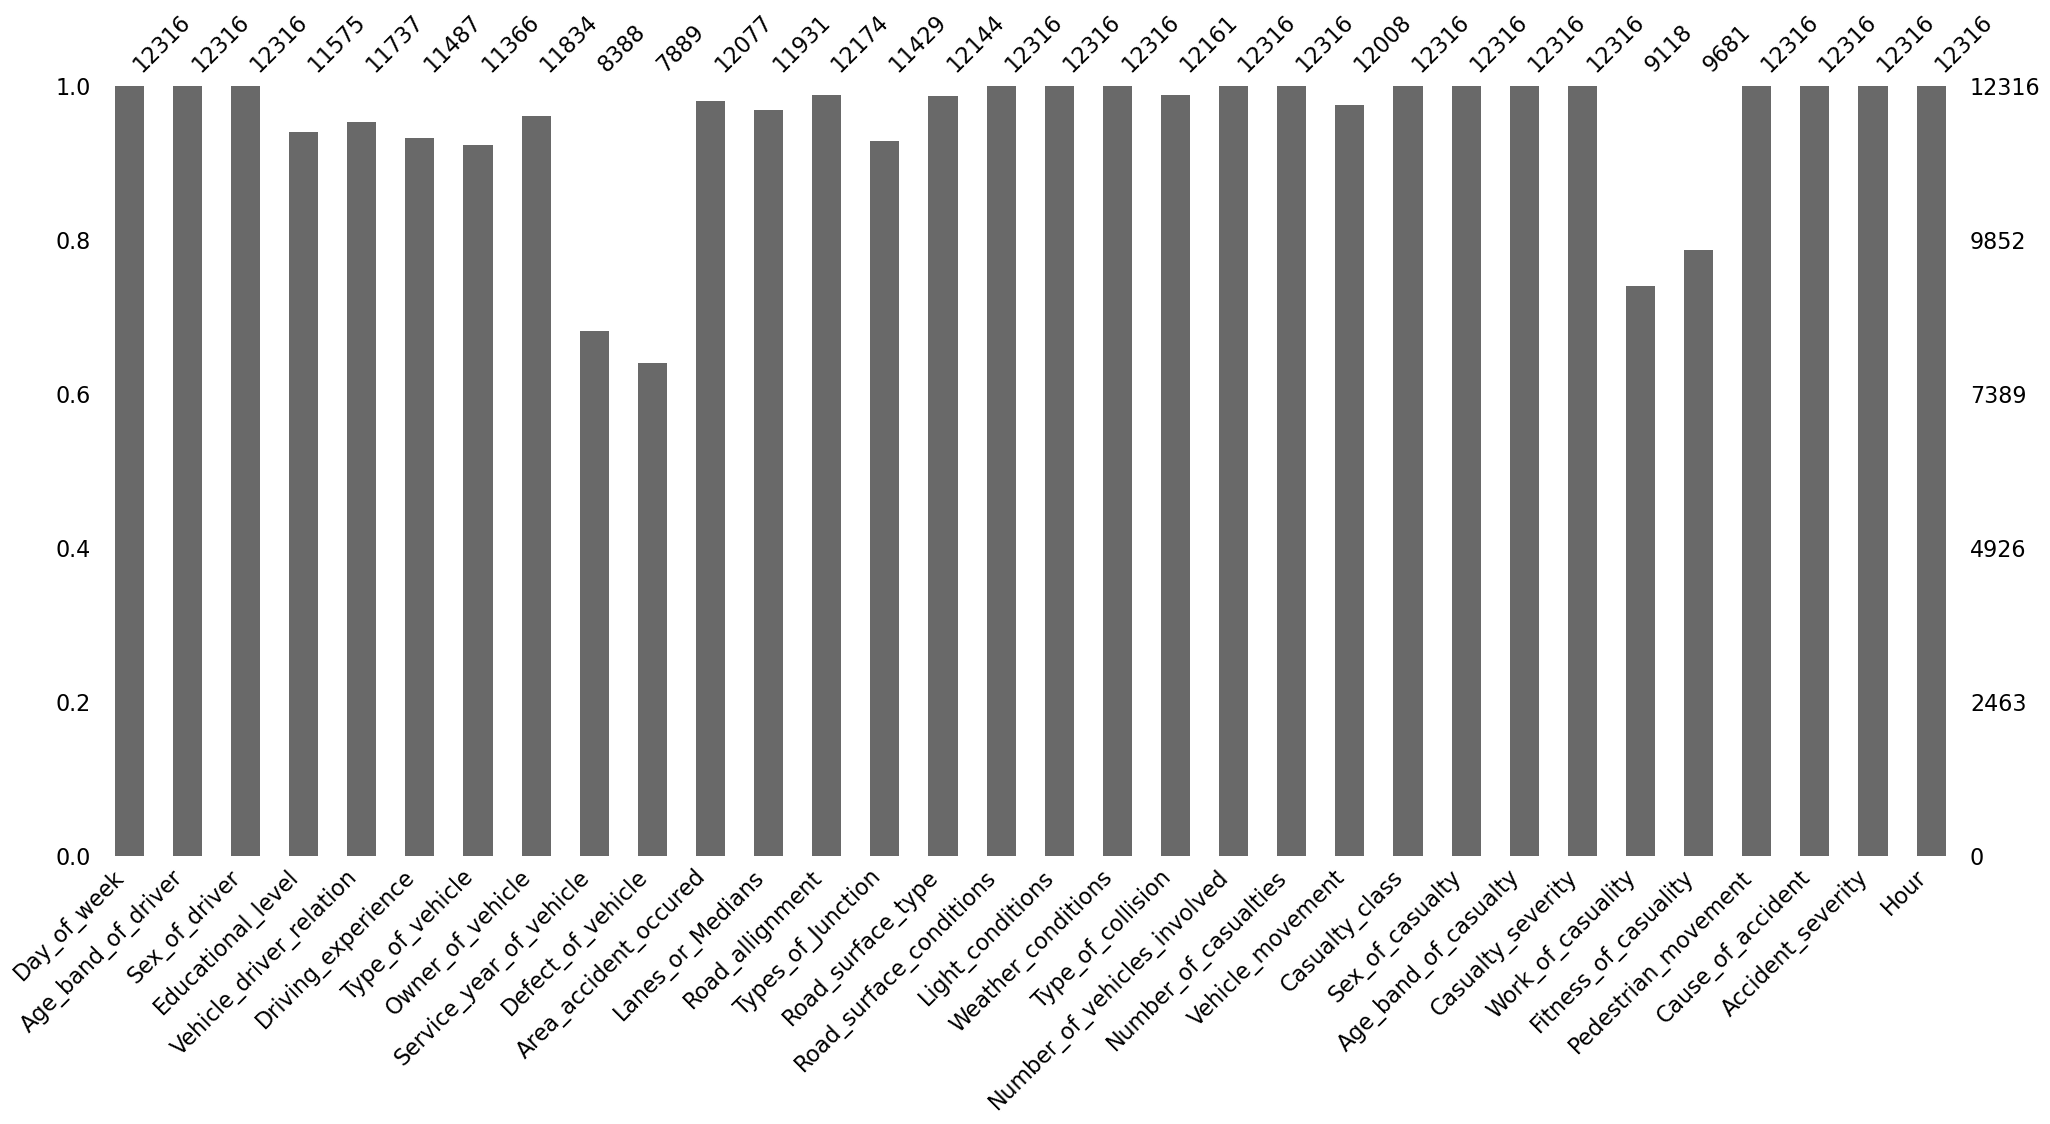

In [64]:
msno.bar(df)

<Axes: >

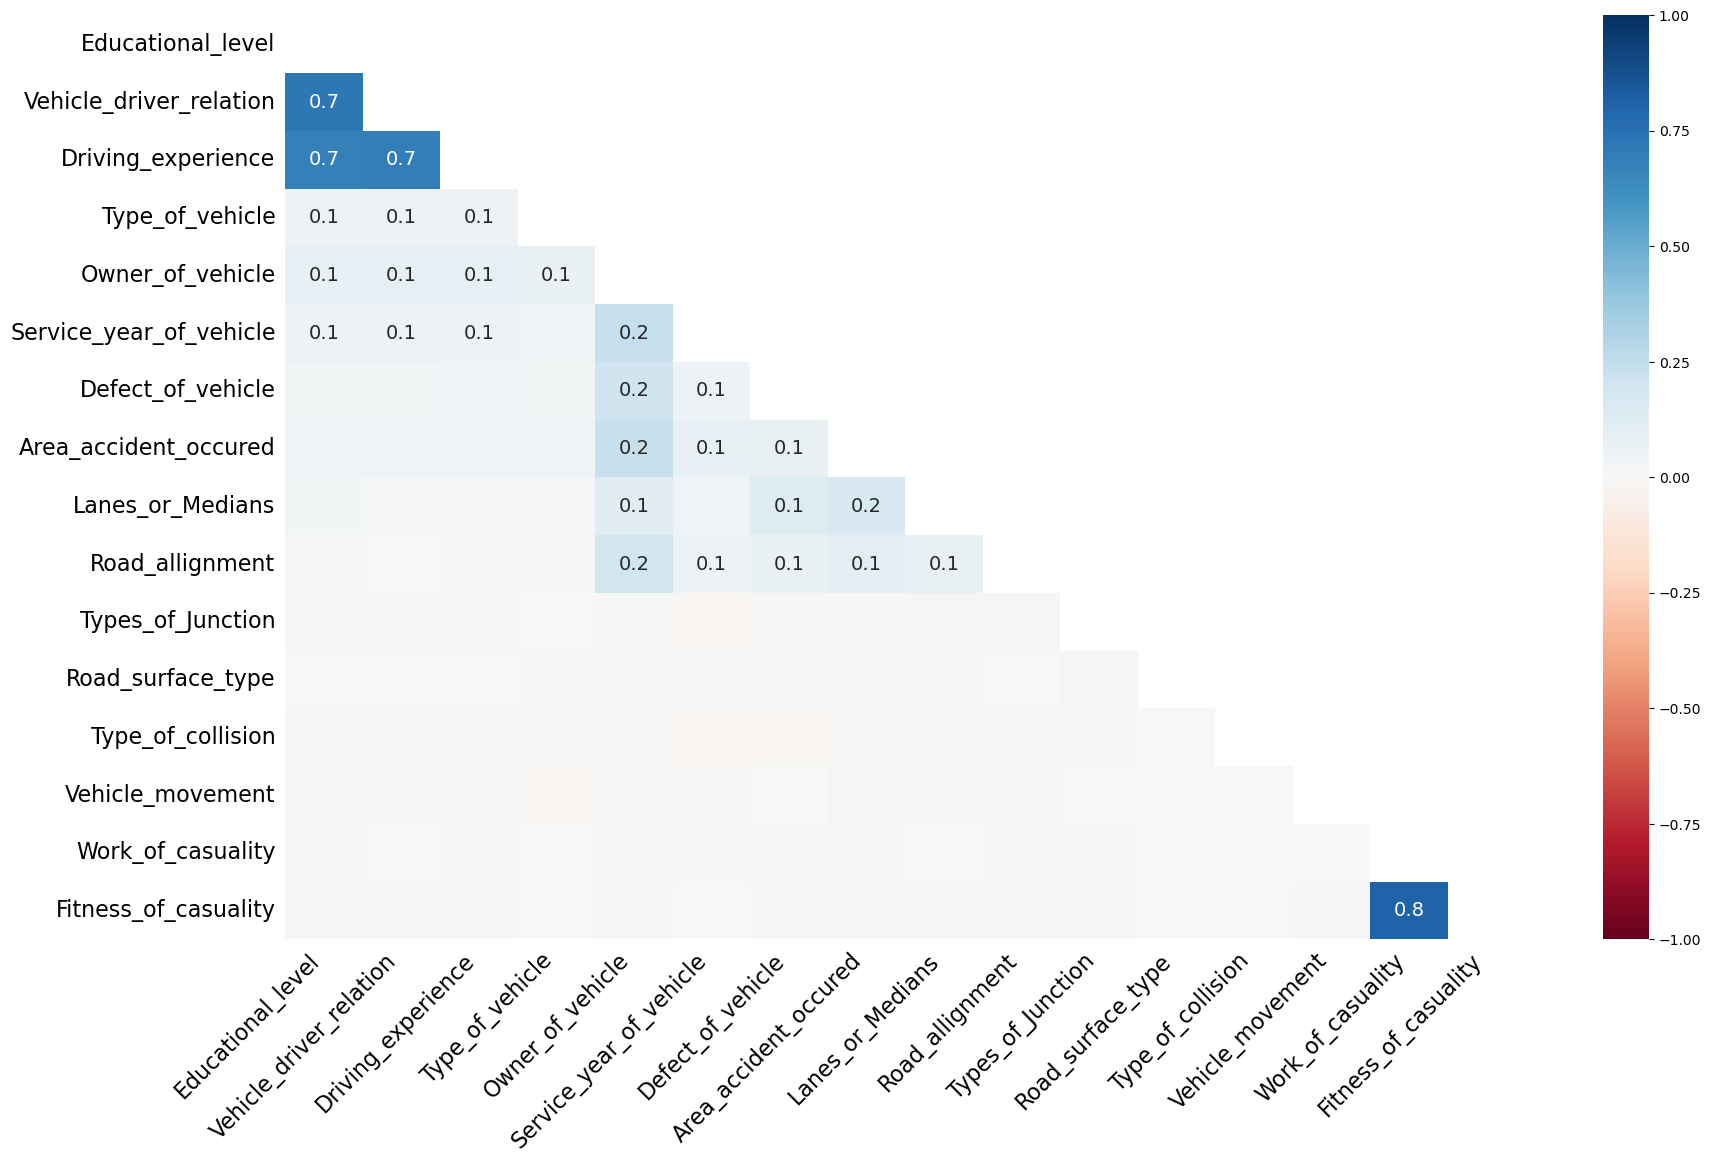

In [65]:
msno.heatmap(df)

In [124]:
mdf1 = df.copy(deep=True)

In [125]:
mdf1.drop(columns = ['Defect_of_vehicle','Work_of_casuality','Fitness_of_casuality','Vehicle_driver_relation'],inplace=True)

In [126]:
# imputing with mode of values
impute_col = mdf1.isna().sum()[mdf1.isna().sum()!=0].index.to_list()
for col in impute_col:
    mode=mdf1[col].mode()[0]
    mdf1[col].fillna(mode,inplace=True)

In [127]:
mdf1.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
Hour                           0
dtype: int64

In [128]:
#without using KNNImputer

def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

mdf1 = ordinal_encoder(mdf1, mdf1.drop(['Accident_severity'], axis=1).columns)
mdf1.shape

(12316, 28)

In [129]:
mdf1.head()

Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0            1                   0              1                  0   
1            1                   1              1                  4   
2            1                   0              1                  4   
3            3                   0              1                  4   
4            3                   0              1                  4   

   Driving_experience  Type_of_vehicle  Owner_of_vehicle  \
0                   0                0                 3   
1                   3               11                 3   
2                   0                5                 3   
3                   2               11                 0   
4                   1                0                 3   

   Service_year_of_vehicle  Area_accident_occured  Lanes_or_Medians  ...  \
0                        3                      9                 2  ...   
1                        2                      6                 4  ...   
2                        5                      1                 6  ...   
3                        5                      6                 6  ...   
4                        2                      4                 6  ...   

   Number_of_casualties  Vehicle_movement  Casualty_class  Sex_of_casualty  \
0                     1                 2               3                2   
1                     1                 2               3                2   
2                     1                 2               0                1   
3                     1                 2               2                0   
4                     1                 2               3                2   

   Age_band_of_casualty  Casualty_severity  Pedestrian_movement  \
0                     5                  3                    5   
1                     5                  3                    5   
2                     1                  2                    5   
3                     0                  2                    5   
4                     5                  3                    5   

   Cause_of_accident  Accident_severity  Hour  
0                  9      Slight Injury    17  
1                 16      Slight Injury    17  
2                  0     Serious Injury    17  
3                  1      Slight Injury     1  
4                 16      Slight Injury     1  

[5 rows x 28 columns]

In [117]:
mdf2 = df.copy(deep=True)
mdf2.drop(columns = ['Defect_of_vehicle','Work_of_casuality','Fitness_of_casuality','Vehicle_driver_relation'],inplace=True)

In [118]:
mdf2.head()

Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0      Monday              18-30          Male   Above high school   
1      Monday              31-50          Male  Junior high school   
2      Monday              18-30          Male  Junior high school   
3      Sunday              18-30          Male  Junior high school   
4      Sunday              18-30          Male  Junior high school   

  Driving_experience      Type_of_vehicle Owner_of_vehicle  \
0              1-2yr           Automobile            Owner   
1         Above 10yr  Public (> 45 seats)            Owner   
2              1-2yr      Lorry (41?100Q)            Owner   
3             5-10yr  Public (> 45 seats)     Governmental   
4              2-5yr                  NaN            Owner   

  Service_year_of_vehicle Area_accident_occured   Lanes_or_Medians  ...  \
0              Above 10yr     Residential areas                NaN  ...   
1                 5-10yrs          Office areas  Undivided Two way  ...   
2                     NaN    Recreational areas              other  ...   
3                     NaN          Office areas              other  ...   
4                 5-10yrs      Industrial areas              other  ...   

  Number_of_casualties Vehicle_movement   Casualty_class Sex_of_casualty  \
0                    2   Going straight               na              na   
1                    2   Going straight               na              na   
2                    2   Going straight  Driver or rider            Male   
3                    2   Going straight       Pedestrian          Female   
4                    2   Going straight               na              na   

  Age_band_of_casualty Casualty_severity Pedestrian_movement  \
0                   na                na    Not a Pedestrian   
1                   na                na    Not a Pedestrian   
2                31-50                 3    Not a Pedestrian   
3                18-30                 3    Not a Pedestrian   
4                   na                na    Not a Pedestrian   

            Cause_of_accident  Accident_severity Hour  
0             Moving Backward      Slight Injury   17  
1                  Overtaking      Slight Injury   17  
2   Changing lane to the left     Serious Injury   17  
3  Changing lane to the right      Slight Injury    1  
4                  Overtaking      Slight Injury    1  

[5 rows x 28 columns]

In [119]:
mdf2.isna().sum()

Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity                 0
Hour                        

In [120]:
#using KNNImputer
def label_encoder_imputer(dataframe, columns):
    for col in columns:
        keys = dataframe[col].sort_values().unique()
        vals = np.arange(dataframe[col].nunique())
        dic = dict(zip(keys,vals))
        dicts.append(dic)
        array=np.array(dataframe[col].map(dic))
        knn_imputer = KNNImputer(n_neighbors=15,weights='uniform')
        series = knn_imputer.fit_transform(array.reshape(-1,1))
        new_series = np.squeeze(series)
        new_series = pd.Series(new_series.astype(int))
        dataframe[col]=new_series
    return dataframe

mdf2 = label_encoder_imputer(mdf2, mdf2.drop(['Accident_severity'], axis=1).columns)

In [121]:
mdf2.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
Hour                           0
dtype: int64

In [122]:
mdf2.head()

Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0            1                   0              1                  0   
1            1                   1              1                  4   
2            1                   0              1                  4   
3            3                   0              1                  4   
4            3                   0              1                  4   

   Driving_experience  Type_of_vehicle  Owner_of_vehicle  \
0                   0                0                 3   
1                   3               11                 3   
2                   0                5                 3   
3                   2               11                 0   
4                   1                5                 3   

   Service_year_of_vehicle  Area_accident_occured  Lanes_or_Medians  ...  \
0                        3                      9                 2  ...   
1                        2                      6                 4  ...   
2                        2                      1                 6  ...   
3                        2                      6                 6  ...   
4                        2                      4                 6  ...   

   Number_of_casualties  Vehicle_movement  Casualty_class  Sex_of_casualty  \
0                     1                 2               3                2   
1                     1                 2               3                2   
2                     1                 2               0                1   
3                     1                 2               2                0   
4                     1                 2               3                2   

   Age_band_of_casualty  Casualty_severity  Pedestrian_movement  \
0                     5                  3                    5   
1                     5                  3                    5   
2                     1                  2                    5   
3                     0                  2                    5   
4                     5                  3                    5   

   Cause_of_accident  Accident_severity  Hour  
0                  9      Slight Injury    17  
1                 16      Slight Injury    17  
2                  0     Serious Injury    17  
3                  1      Slight Injury     1  
4                 16      Slight Injury     1  

[5 rows x 28 columns]

In [130]:
fdf = mdf2.copy(deep=True)

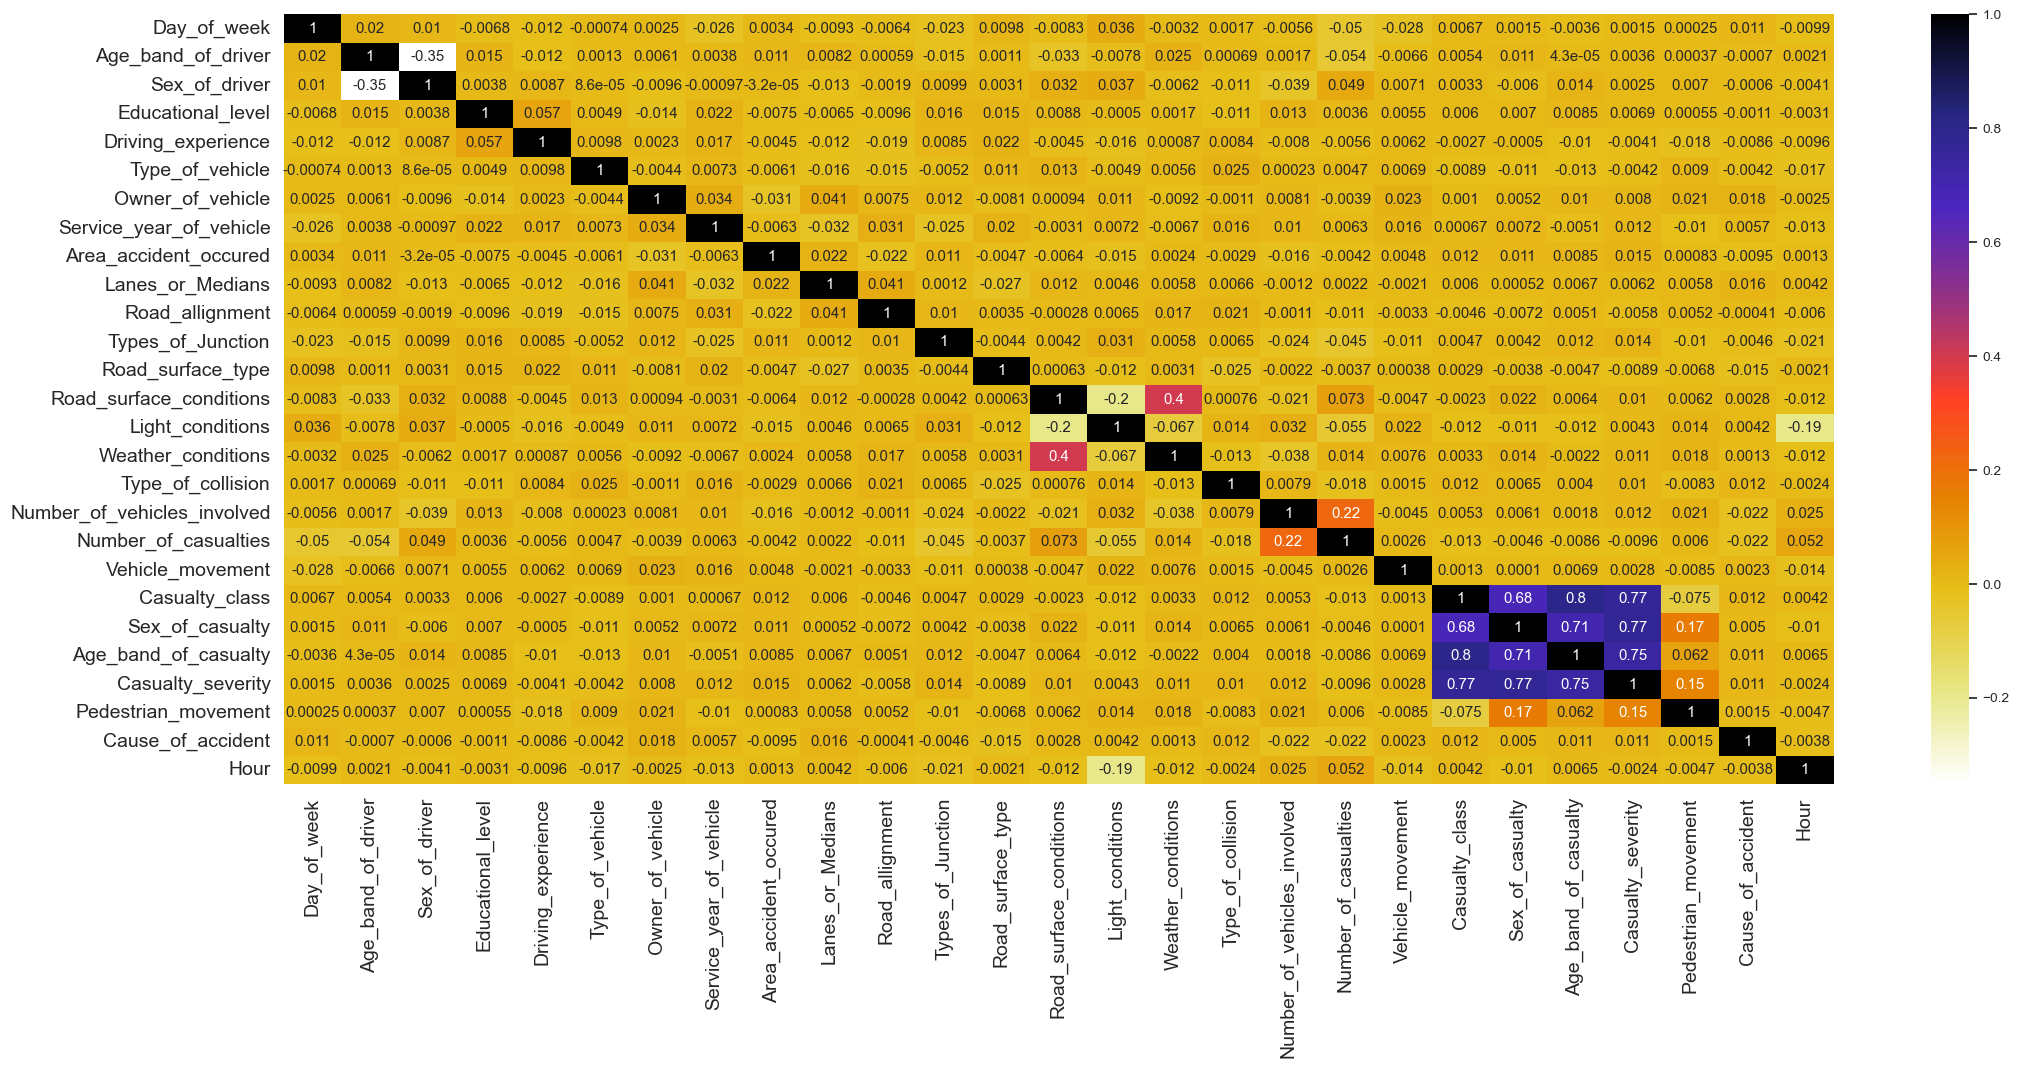

In [123]:
plt.figure(figsize=(25,10))
sns.set(font_scale=0.9)
sns.heatmap(mdf2.drop(['Accident_severity'],axis=1).corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### <span style="font-family:cursive;text-align:center"> Upsampling</span>

In [145]:
X = fdf.drop('Accident_severity',axis=1)
y = fdf['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 27) (3695, 27) (8621,) (3695,)


In [146]:
Counter(y_test)

Counter({'Slight Injury': 3136, 'Serious Injury': 507, 'Fatal injury': 52})

In [147]:
#upsampling the imbalanced data
counter = Counter(y_train)
print("Before Upsampling: ", X_train.shape, y_train.shape)

for k,v in counter.items():
    percentage = round((v/len(y_train)*100),2)
    print(f"Severity: {k}, count: {v} ({percentage}%)")
    
    
print("\n")
oversampler = SMOTE()
X_train, y_train = oversampler.fit_resample(X_train, y_train)

counter = Counter(y_train)

for k,v in counter.items():
    percentage = round((v/len(y_train)*100),2)
    print("After Upsampling")
    print(f"Severity: {k}, count: {v} ({percentage}%)")

print('\n')
print("Before Upsampling: ", X_train.shape, y_train.shape)

Before Upsampling:  (8621, 27) (8621,)
Severity: Slight Injury, count: 7279 (84.43%)
Severity: Serious Injury, count: 1236 (14.34%)
Severity: Fatal injury, count: 106 (1.23%)


After Upsampling
Severity: Slight Injury, count: 7279 (33.33%)
After Upsampling
Severity: Serious Injury, count: 7279 (33.33%)
After Upsampling
Severity: Fatal injury, count: 7279 (33.33%)


Before Upsampling:  (21837, 27) (21837,)


In [153]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

In [169]:
def nmodels(X_train, y_train, X_test, y_test, **kwargs):
    model_scores = {}
    models = []
    
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.array(y_train))
        y_hat = xgb.predict(X_test._get_numeric_data())
        model_scores['xgb'] = accuracy_score(y_test, y_hat)
        models.append(xgb)
        
    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        model_scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        model_scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)
        
    return model_scores, models

In [170]:
scores,models = nmodels(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)
print(scores)

{'xgb': 0.8002706359945873, 'rf': [0.8035182679296347], 'extree': [0.8143437077131258]}


In [185]:
def modelling(X_train, y_train, X_test, y_test, *args):
    model_scores = {} 
    models = []
    model_f1scores = []
    for n in args:
        rf = RandomForestClassifier(n_estimators=n)
        rf.fit(X_train, y_train)
        y_hat = rf.predict(X_test)
        model_scores[n]=accuracy_score(y_test, y_hat)
        f1sc = f1_score(y_test,y_hat, average=None)
        model_f1scores.append(f1sc)
        models.append(rf)
    return model_scores, models, model_f1scores

In [186]:
scores,models,f1score = modelling(X_train,y_train, X_test, y_test,50,100,150,200,250,300)
print(scores)

{50: 0.7948579161028417, 100: 0.8043301759133965, 150: 0.8010825439783491, 200: 0.8051420838971584, 250: 0.7991880920162382, 300: 0.8013531799729364}


In [188]:
print(f1score)

[array([0.15873016, 0.21905805, 0.88306829]), array([0.09836066, 0.22902494, 0.88971615]), array([0.0952381 , 0.21566402, 0.88799255]), array([0.0952381 , 0.22298851, 0.89050643]), array([0.09836066, 0.20681818, 0.88664909]), array([0.0952381 , 0.21640091, 0.8878896 ])]
